**Importing the Libraries**

In [89]:
import numpy as np
import pandas as pd

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [92]:
df = sns.load_dataset("mpg")

In [93]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [95]:
df.drop(['name'],axis=1,inplace=True)

In [96]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


**Summary of the Dataset**

In [98]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Data Preprocessing**

In [100]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [101]:
df[df.isnull().any(axis=1)]            #df[df.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [102]:
df.dropna(inplace=True)

In [103]:
df.isnull().sum().any()

False

In [104]:
df.shape

(392, 8)

**Univariate Analysis**

In [106]:
df.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [107]:
df.cylinders.value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

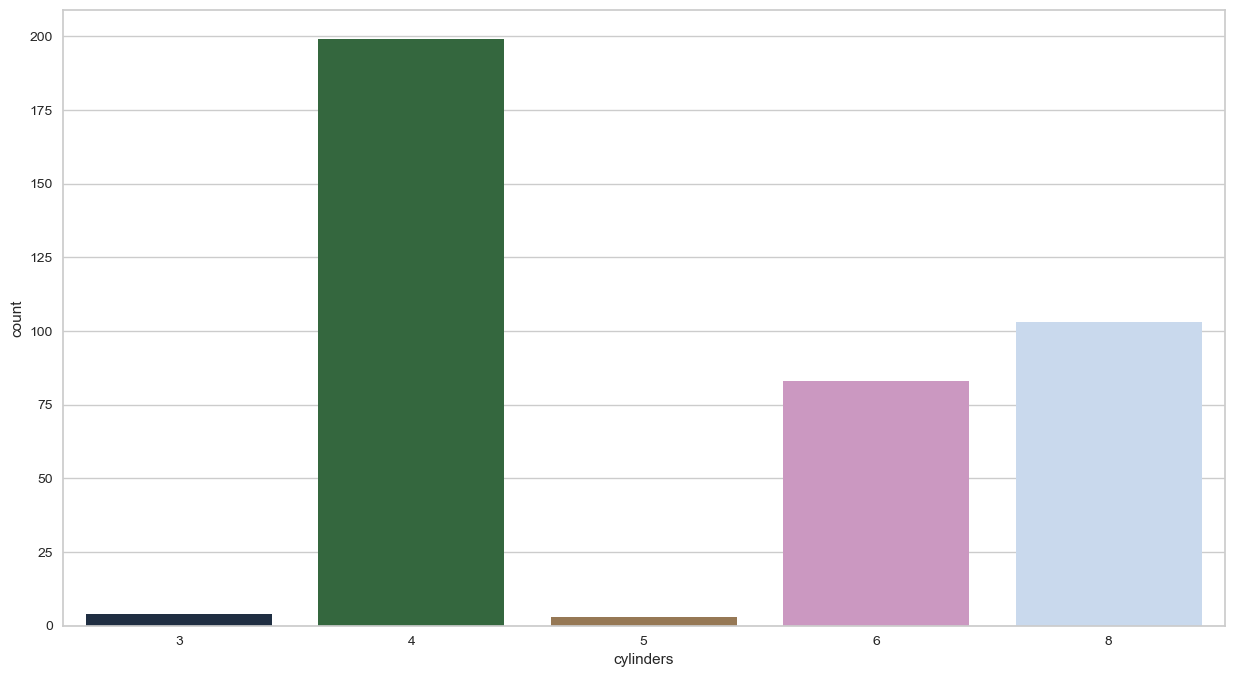

In [108]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x= df['cylinders'], palette='cubehelix')
plt.show()

In [109]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [110]:
df.model_year=1900+df.model_year

In [111]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


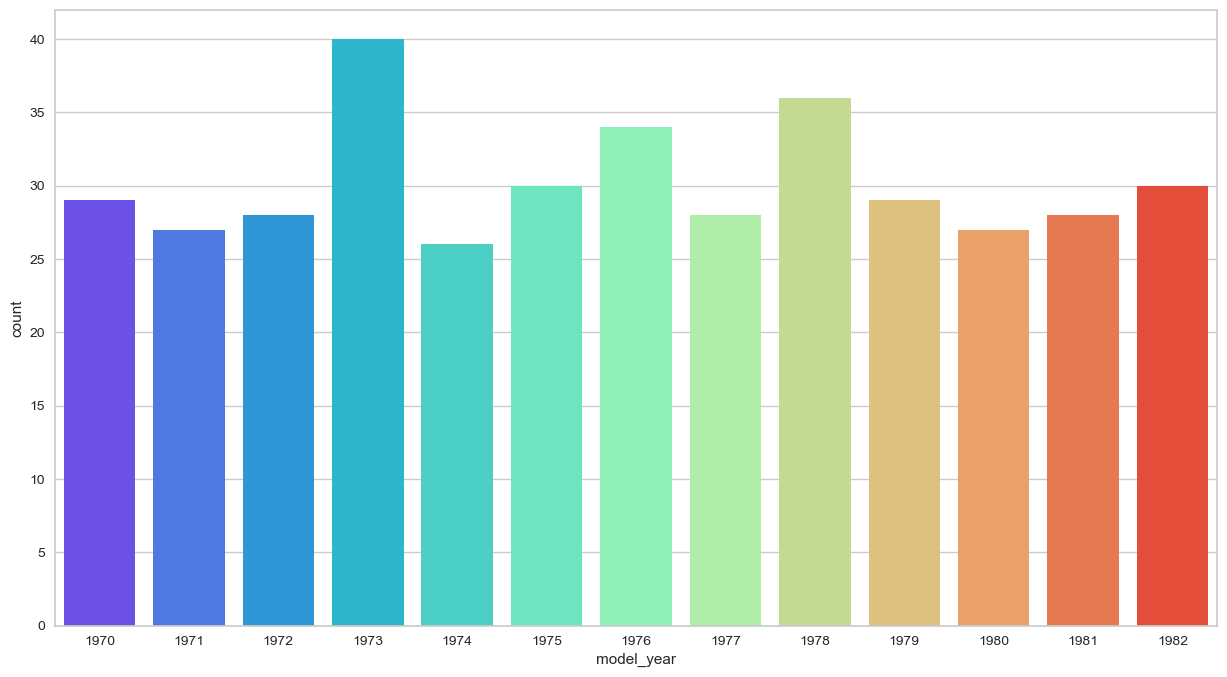

In [112]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x= df['model_year'], palette='rainbow');

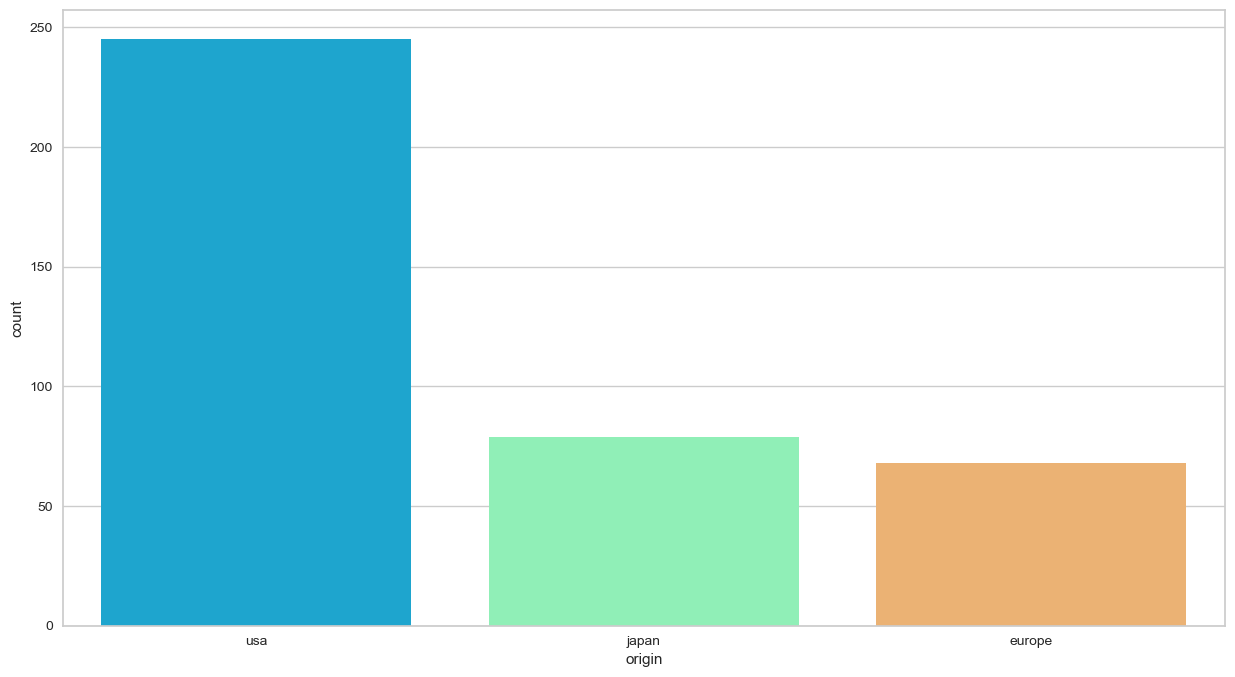

In [113]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x= df['origin'], palette='rainbow');

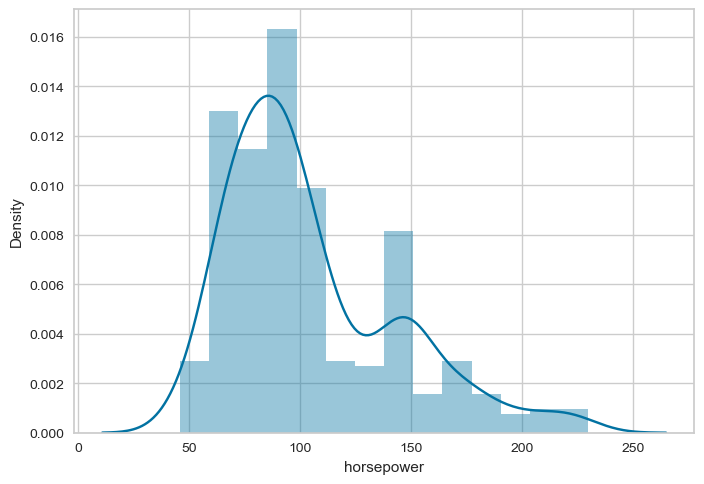

In [114]:
sns.distplot(df['horsepower']);

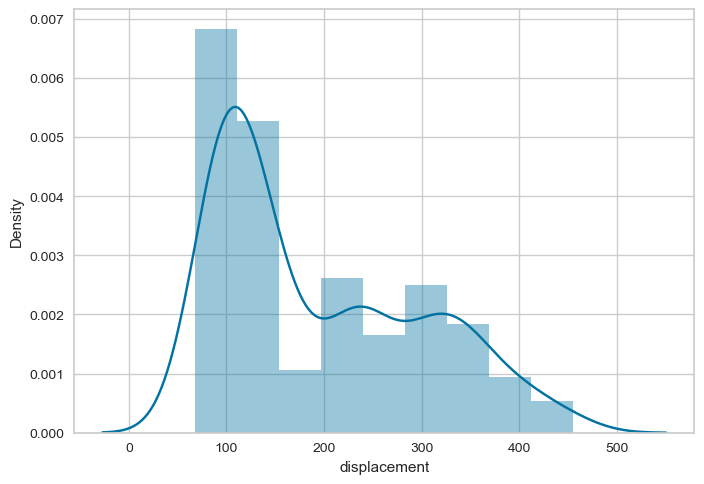

In [115]:
sns.distplot(df['displacement']);

**Bivariate Analysis**

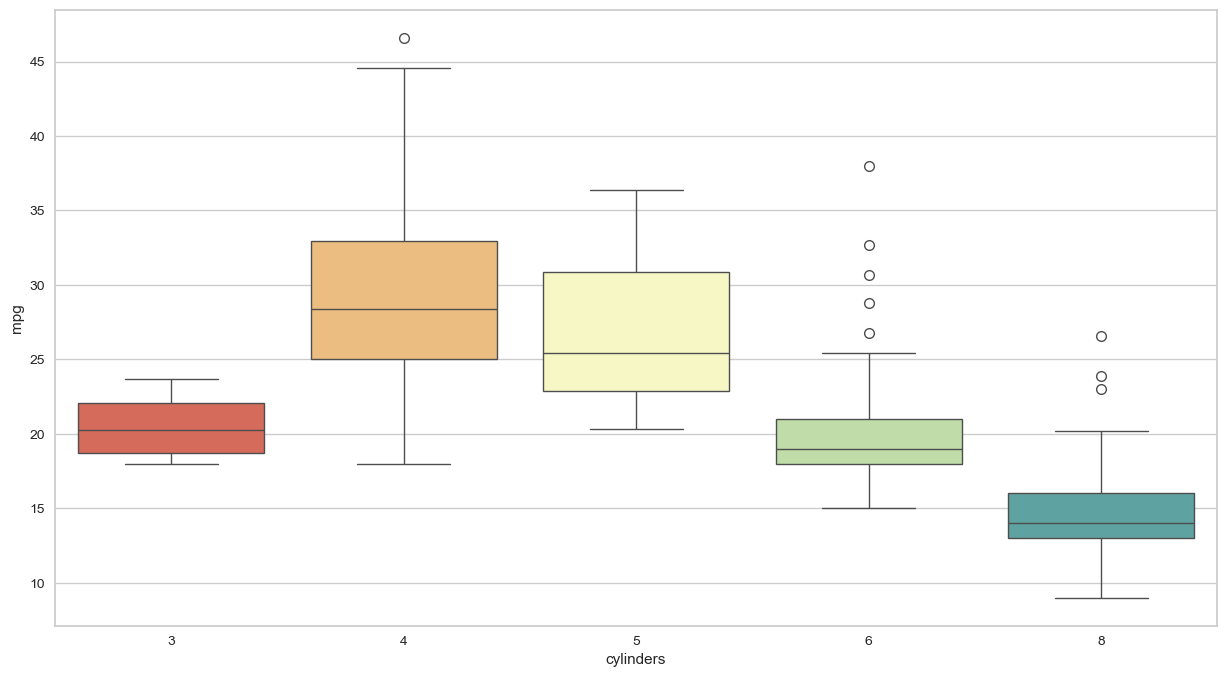

In [117]:
plt.figure(figsize=(15,8))
sns.boxplot(x='cylinders',y='mpg',data=df,palette='Spectral');

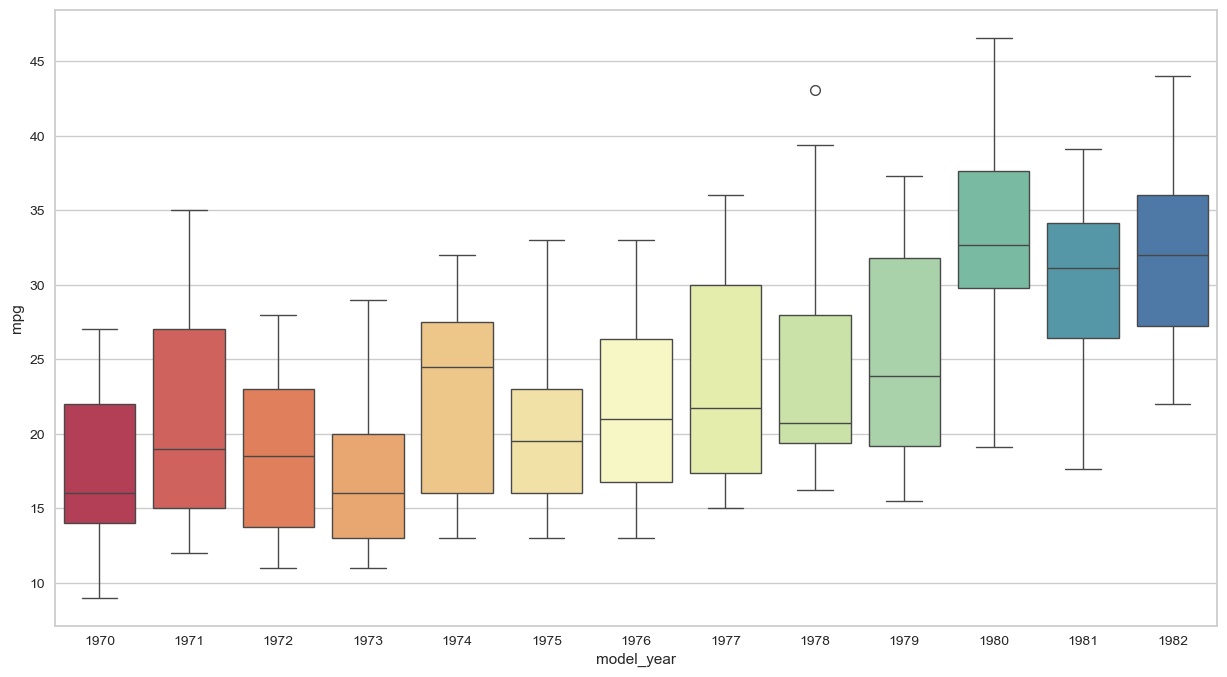

In [118]:
plt.figure(figsize=(15,8))
sns.boxplot(x='model_year',y='mpg',data=df,palette='Spectral');

**Multivariate Analysis**

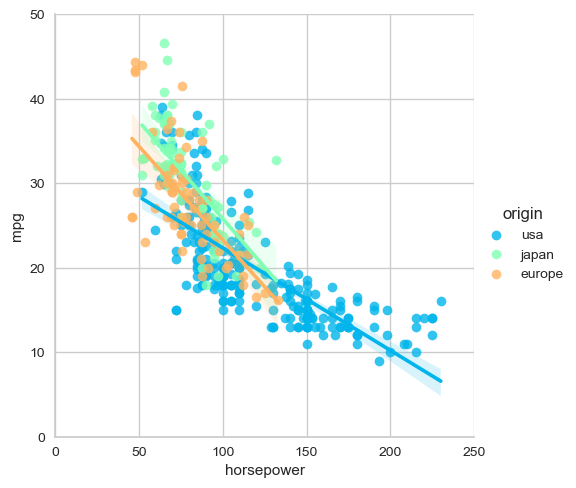

In [120]:
graph = sns.lmplot(x='horsepower',y='mpg',hue='origin',data=df,palette='rainbow')
graph.set(xlim=(0,250))
graph.set(ylim=(0,50));

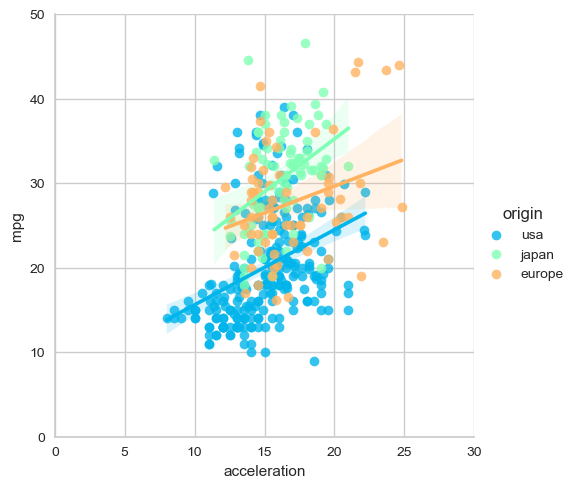

In [121]:
graph = sns.lmplot(x='acceleration',y='mpg',hue='origin',data=df,palette='rainbow')
graph.set(xlim=(0,30))
graph.set(ylim=(0,50));

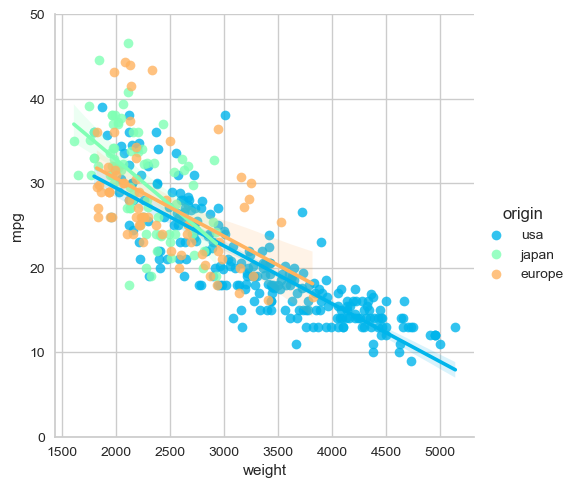

In [122]:
graph = sns.lmplot(x='weight',y='mpg',hue='origin',data=df,palette='rainbow')

graph.set(ylim=(0,50));

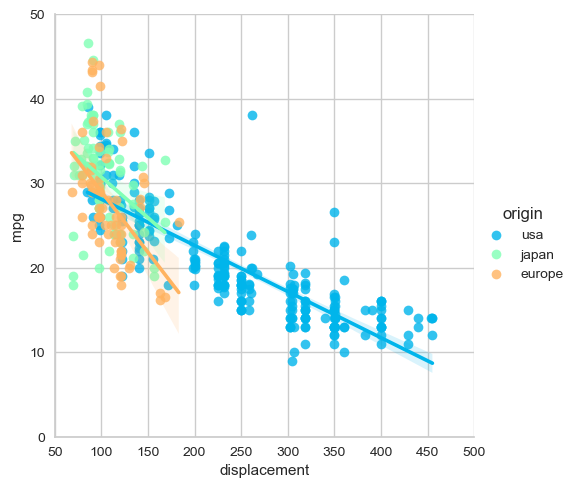

In [123]:
graph = sns.lmplot(x='displacement',y='mpg',hue='origin',data=df,palette='rainbow')
graph.set(xlim=(50,500))
graph.set(ylim=(0,50));

**Heatmap of Correlation Matrix**

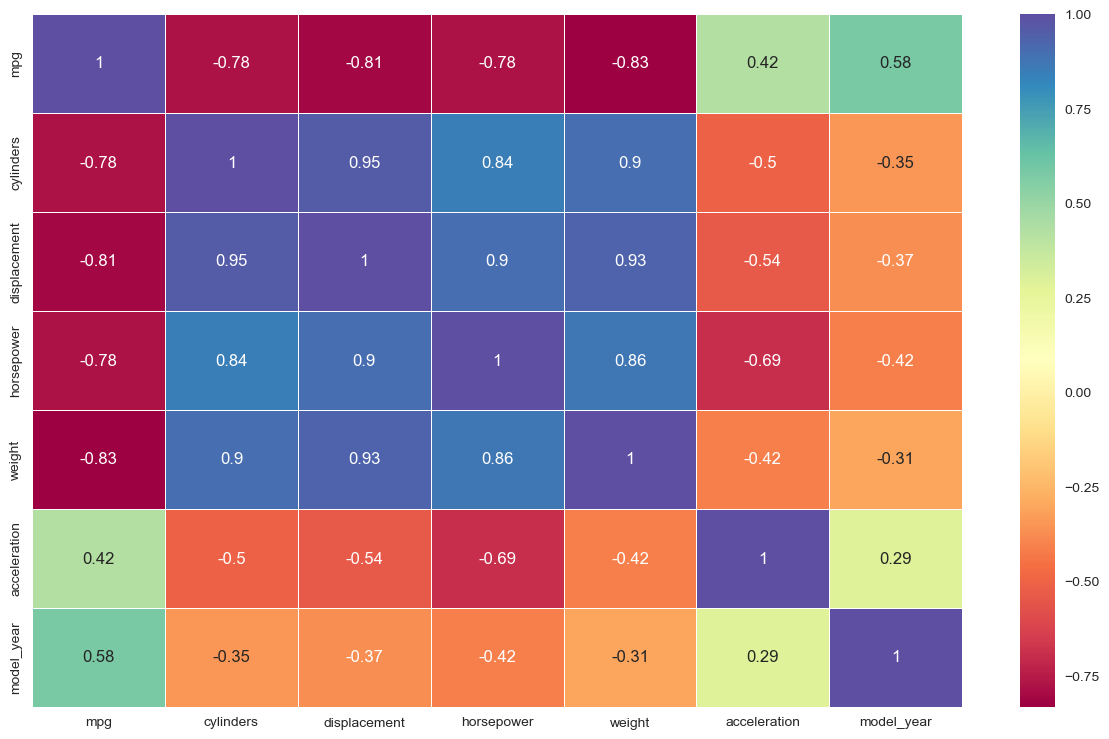

In [125]:
plt.figure(figsize=(15,9))
sns.heatmap(df.drop(['origin'],axis=1).corr(),annot = True, linewidth=0.5, cmap = "Spectral");

In [126]:
df.drop(['acceleration','displacement'],axis=1,inplace=True)

In [127]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa


In [128]:
from datetime import datetime

In [129]:
today = datetime.today()

In [130]:
today

datetime.datetime(2024, 7, 28, 1, 35, 15, 40818)

In [131]:
this_year = today.year

In [132]:
this_year

2024

In [133]:
df['age'] = (this_year-df.model_year)

In [134]:
df.drop(['model_year'],axis=1,inplace=True)

In [135]:
df.head()

,mpg,cylinders,horsepower,weight,origin,age
0,18.0,8,130.0,3504,usa,54
1,15.0,8,165.0,3693,usa,54
2,18.0,8,150.0,3436,usa,54
3,16.0,8,150.0,3433,usa,54
4,17.0,8,140.0,3449,usa,54


In [136]:
df = pd.get_dummies(df,drop_first=True,dtype=int)

In [137]:
df.head()

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,0,1
1,15.0,8,165.0,3693,54,0,1
2,18.0,8,150.0,3436,54,0,1
3,16.0,8,150.0,3433,54,0,1
4,17.0,8,140.0,3449,54,0,1


**Modelling**

In [139]:
X = df.drop(['mpg'],axis=1).values
y = df['mpg']

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
X_train

array([[6.000e+00, 1.100e+02, 3.620e+03, 4.600e+01, 0.000e+00, 1.000e+00],
       [4.000e+00, 9.200e+01, 2.572e+03, 4.800e+01, 0.000e+00, 1.000e+00],
       [6.000e+00, 9.700e+01, 2.984e+03, 4.900e+01, 0.000e+00, 1.000e+00],
       ...,
       [4.000e+00, 8.500e+01, 2.855e+03, 4.600e+01, 0.000e+00, 1.000e+00],
       [4.000e+00, 6.500e+01, 2.380e+03, 4.300e+01, 0.000e+00, 1.000e+00],
       [8.000e+00, 1.500e+02, 4.997e+03, 5.100e+01, 0.000e+00, 1.000e+00]])

In [143]:
y_train

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
sc = StandardScaler()
X_train[:,:-2] = sc.fit_transform(X_train[:,:-2])

In [147]:
X_test[:,:-2] =sc.transform(X_test[:,:-2])

In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
lm_model = LinearRegression()

In [150]:
lm_model.fit(X_train,y_train)

LinearRegression()

In [151]:
lm_model.intercept_

25.057708824057826

In [152]:
coef_param = pd.DataFrame(lm_model.coef_,index=df.columns[1:],columns=['coefficient'])
coef_param

,coefficient
cylinders,0.344735
horsepower,-0.540567
weight,-4.811086
age,-2.826633
origin_japan,0.401853
origin_usa,-2.385047


In [153]:
y_pred = lm_model.predict(X_test)

In [154]:
compare = pd.DataFrame({'y_test':y_test,
             'y_pred':y_pred}).reset_index(drop=True)

In [155]:
compare.sample(10)

,y_test,y_pred
23,18.0,15.016313
67,29.0,30.314432
3,26.0,24.706647
38,13.0,11.908848
74,17.6,24.048994
37,25.0,24.365480
9,29.0,29.452644
46,19.0,17.086203
17,32.4,32.958953
0,26.0,26.545174


In [156]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [157]:
def evaluation_metric(actual,pred):

    mae = mean_absolute_error(actual,pred)
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mse)
    score = r2_score(actual,pred)
    return print(f'r2_score: {score} \nmse: {mse} \nmae: {mae}\nrmse: {rmse}')

In [158]:
evaluation_metric(y_test,y_pred)

r2_score: 0.7798249880881906 
mse: 11.237861022823067 
mae: 2.5188281576150926
rmse: 3.3522919059686713


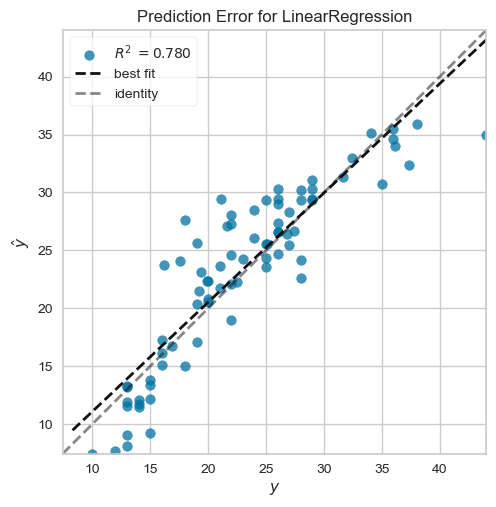

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [159]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lm_model)

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)

visualizer.show()

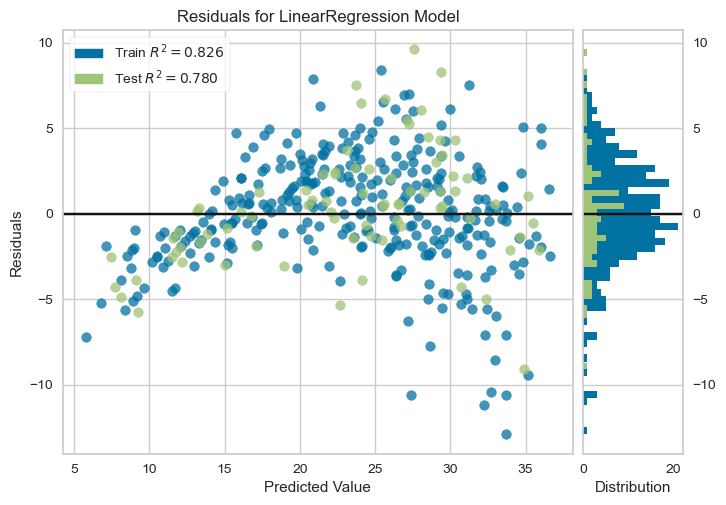

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [160]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lm_model)

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)

visualizer.show()